In [2]:
# For auto-reloading external modules see
# http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import numpy
import observations.dimensions.two.sampling as observe
import matplotlib.pyplot as plt
import seaborn as sns

from defaults.plot import *
import matplotlib as mpl

enable_latex_export()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


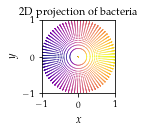

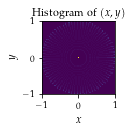

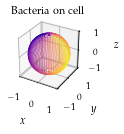

In [3]:
from math import pi, sin, cos, acos
from observations.dimensions.one.sampling import step_sample

samplesize = 75
# based on http://corysimon.github.io/articles/uniformdistn-on-sphere/
# or https://mathworld.wolfram.com/SpherePointPicking.html
# or https://www.bogotobogo.com/Algorithms/uniform_distribution_sphere.php
thetas = numpy.array([step_sample(i, 0, 2 * pi, samplesize) for i in range(samplesize + 1)]).reshape(-1, 1)
phis = numpy.array([acos(step_sample(i, -1, 1, samplesize)) for i in range(samplesize + 1)]).reshape(-1, 1)

def numpy_spherical_to_cartesian(arr):
    def helper(arr):
        theta = arr[0]
        phi = arr[1]
        return [sin(phi) * cos(theta), sin(phi) * sin(theta), cos(phi)]

    return numpy.apply_along_axis(helper, 1, arr)

spherical_points = numpy.array(numpy.meshgrid(thetas, phis)).T.reshape(-1, 2)
cartesian_points = numpy_spherical_to_cartesian(spherical_points)
colors = numpy.abs(spherical_points[:, 0] - pi)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
plt.scatter(cartesian_points[:,0], cartesian_points[:,1], s=0.6, c=colors, cmap='plasma', edgecolor='none', rasterized=True)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("2D projection of bacteria")
plt.savefig("figures/bacteria/cell2d.pdf", dpi=dpi, bbox_inches='tight')
plt.show()


# TODO: this figure was created with 500 sample points, bins = 70
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
plt.title(r"Histogram of $\left(x,y\right)$")
plt.hist2d(cartesian_points[:,0], cartesian_points[:,1], bins=63, rasterized=True)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig("figures/bacteria/density.pdf", dpi=dpi, bbox_inches='tight')
plt.show()

delta = 2 * pi / 10
for i in range(1):
    new_theta = (thetas + i * delta) % (2 * pi)
    spherical_points = numpy.array(numpy.meshgrid(new_theta, phis)).T.reshape(-1, 2)
    cartesian_points = numpy_spherical_to_cartesian(spherical_points)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect((numpy.ptp(cartesian_points[:,0]), numpy.ptp(cartesian_points[:,1]), numpy.ptp(cartesian_points[:,2])))
    ax.scatter(cartesian_points[:,0], cartesian_points[:,1], cartesian_points[:,2], s=0.6, c=colors, cmap='plasma', edgecolor='none', rasterized=True)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$z$")
    plt.title("Bacteria on cell", y=1.05)
    plt.savefig("figures/bacteria/cell.pdf", dpi=dpi, bbox_inches='tight')
    plt.show()

In [3]:
delta = 2 * pi / 10
#samplesize = 150
thetas0 = numpy.array([step_sample(i, 0, 2 * pi, samplesize) for i in range(samplesize + 1)]).reshape(-1, 1)
thetas1 = (thetas0 + delta) % (2 * pi)
thetas2 = (thetas0 + 2 * delta) % (2 * pi)
#thetas3 = (thetas0 + 3 * delta) % (2 * pi)
#thetas4 = (thetas0 + 4 * delta) % (2 * pi)
phis = numpy.array([acos(step_sample(i, 0, 2, samplesize) - 1) for i in range(samplesize + 1)]).reshape(-1, 1)

cartesian_points0 = numpy_spherical_to_cartesian(numpy.array(numpy.meshgrid(thetas0, phis)).T.reshape(-1, 2))
cartesian_points1 = numpy_spherical_to_cartesian(numpy.array(numpy.meshgrid(thetas1, phis)).T.reshape(-1, 2))
cartesian_points2 = numpy_spherical_to_cartesian(numpy.array(numpy.meshgrid(thetas2, phis)).T.reshape(-1, 2))
#cartesian_points3 = numpy_spherical_to_cartesian(numpy.array(numpy.meshgrid(thetas3, phis)).T.reshape(-1, 2))
#cartesian_points4 = numpy_spherical_to_cartesian(numpy.array(numpy.meshgrid(thetas4, phis)).T.reshape(-1, 2))

measurements = cartesian_points0[:,[0,1]]
measurements = numpy.append(measurements, cartesian_points1[:,[0,1]], axis=1)
measurements = numpy.append(measurements, cartesian_points2[:,[0,1]], axis=1)
#measurements = numpy.append(measurements, cartesian_points3[:,[0,1]], axis=1)
#measurements = numpy.append(measurements, cartesian_points4[:,[0,1]], axis=1)

print(measurements)

[[ 1.22464680e-16  0.00000000e+00  9.90760073e-17  7.19829328e-17
   3.78436673e-17  1.16470832e-16]
 [ 2.29395340e-01  0.00000000e+00  1.85584729e-01  1.34835198e-01
   7.08870586e-02  2.18167933e-01]
 [ 3.22214559e-01  0.00000000e+00  2.60677054e-01  1.89392966e-01
   9.95697747e-02  3.06444256e-01]
 ...
 [ 3.22214559e-01 -7.89198057e-17  2.60677054e-01  1.89392966e-01
   9.95697747e-02  3.06444256e-01]
 [ 2.29395340e-01 -5.61856539e-17  1.85584729e-01  1.34835198e-01
   7.08870586e-02  2.18167933e-01]
 [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


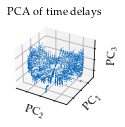

In [4]:
from sklearn.preprocessing import StandardScaler
measurements_scaler = StandardScaler()
measurements_scaled = measurements_scaler.fit_transform(measurements)

from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'full')

#%TODO: standardize measurmenets before?
data = pca.fit_transform(measurements_scaled)[2:]
measurements = measurements[2:]

pca_scaler = StandardScaler()
measurements_fit = pca_scaler.fit_transform(data)

# todo color based on theta

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(measurements_fit[:,0], measurements_fit[:,1], measurements_fit[:,2], s=0.5, cmap='cividis', edgecolor='none', rasterized=True)

plt.title("PCA of time delays")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

ax.set_xlabel("PC$_2$", labelpad=-10)
ax.set_ylabel("PC$_1$", labelpad=-10)
ax.set_zlabel("PC$_3$", labelpad=-10)

plt.savefig("figures/bacteria/pca.pdf", dpi=dpi, bbox_inches='tight')
plt.show()

In [5]:
%%time

import datafold.pcfold as pfold

X_pcm = pfold.PCManifold(measurements_fit)
X_pcm.optimize_parameters()

print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")

epsilon=0.3974209416246601, cut-off=2.705691092240353
Wall time: 651 ms


In [6]:
%%time

import datafold.dynfold as dfold

num_eigenpairs = 20

# TODO: also show this plot
#dmap = dfold.DiffusionMaps(
#    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
#    n_eigenpairs=num_eigenpairs,
#    dist_kwargs=dict(cut_off=X_pcm.cut_off),
#)

dmap = dfold.DiffusionMaps(
    kernel=pfold.ContinuousNNKernel(k_neighbor=1000, delta=1.0),
    n_eigenpairs=num_eigenpairs
)

dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

from datafold.dynfold import LocalRegressionSelection

selection = LocalRegressionSelection(
    intrinsic_dim=3, n_subsample=3000, strategy="dim"
).fit(dmap.eigenvectors_)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")

Found parsimonious eigenvectors (indices): [1 2 8]
Wall time: 4min 27s


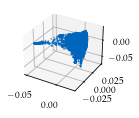

In [7]:
target_mapping = selection.transform(dmap.eigenvectors_)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_mapping[:,0], target_mapping[:,1], target_mapping[:,2], s=1)
plt.show()

In [8]:
%%time
import torch
import flows.utils as flows

flow_dist, spline_transform = flows.normalnd_to_samples(torch.tensor(target_mapping, dtype=torch.float), dim=3, steps=1401, normalize=True)
flow_samples = flow_dist.sample(torch.Size([10000])).detach().numpy()

C:\Users\plain\Dropbox\university\21SS\IN2261 Bachelor's Thesis\code\demos\flows\utils.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = torch.tensor(data, dtype=torch.float)


step: 0, loss: -5.55147647857666
step: 200, loss: -9.73263931274414
step: 400, loss: -10.085447311401367
step: 600, loss: -10.138495445251465
step: 800, loss: -10.189862251281738
step: 1000, loss: -10.253954887390137
step: 1200, loss: -10.272092819213867
step: 1400, loss: -10.286067962646484
Wall time: 1min 5s


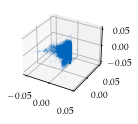

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(flow_samples[:,0], flow_samples[:,1], flow_samples[:,2], s=0.01, cmap='cividis', rasterized=True)
#ax.set_xlim(-1.5, 1.5)
#ax.set_ylim(-1.5, 1.5)
#ax.set_zlim(-4, 4)
plt.show()

In [10]:
%%time

from sklearn.model_selection import cross_val_score, train_test_split
from datafold.dynfold import (
    GeometricHarmonicsInterpolator as GHI,
    LocalRegressionSelection,
)

import pandas as pd
# Ok, now we have transformed a uniform distribution to the embedded space
# We can now reconstruct the fold by learning a way back from this embedding into the original space
# (could have been immediately)
random_state = 1

X_all = measurements_fit
psi_all = target_mapping

# shuffle new training and test set
X_train, X_test, psi_train, psi_test = train_test_split(
    X_all, psi_all, train_size=2 / 3, random_state=random_state
)

# (!!) we use the DMAP space as base space now, and interpolate X as function values
pcm = pfold.PCManifold(psi_train)
pcm.optimize_parameters(random_state=random_state)

opt_epsilon = pcm.kernel.epsilon
opt_cutoff = pcm.cut_off
opt_n_eigenpairs = 500

# test the interpolation quality with PCManifold optimization
gh_interpolant_psi_to_X = GHI(
    #pfold.ContinuousNNKernel(k_neighbor=125, delta=1.0),
    pfold.GaussianKernel(epsilon=opt_epsilon),
    n_eigenpairs=opt_n_eigenpairs,
    dist_kwargs=dict(cut_off=opt_cutoff),
)

gh_interpolant_psi_to_X.fit(psi_train, X_train)

# compute residual and error
residual = gh_interpolant_psi_to_X.score(psi_train, X_train)
error = gh_interpolant_psi_to_X.score(psi_test, X_test)

pd.DataFrame(
    numpy.row_stack([residual, error]),
    index=["residual", "error"],
    columns=["a", "b", "c", "d", "e", "f"],
)

Wall time: 8.48 s


,a,b,c,d,e,f
residual,-0.220895,-0.308789,-0.407513,-0.410074,-0.414855,-0.418541
error,-0.292182,-0.392869,-0.489044,-0.476504,-0.494122,-0.517319


In [11]:
%%time

from skopt.searchcv import BayesSearchCV
from skopt.space import Categorical, Integer, Real

n_iters = 10
numpy.random.seed(123)

train_indices, test_indices = train_test_split(
    numpy.random.permutation(X_train.shape[0]), train_size=2 / 3, test_size=1 / 3
)

class GHIGauss(GHI):
    def __init__(self, epsilon=1, n_eigenpairs=2, cut_off=numpy.inf):

        self.epsilon = epsilon
        self.n_eigenpairs = n_eigenpairs
        self.cut_off = cut_off

        super(GHIGauss, self).__init__(
            kernel=pfold.GaussianKernel(self.epsilon),
            n_eigenpairs=self.n_eigenpairs,
            is_stochastic=False,
            dist_kwargs=dict(cut_off=self.cut_off),
        )

opt = BayesSearchCV(
    GHIGauss(),
    {
        "epsilon": Real(
            pcm.kernel.epsilon / 2, pcm.kernel.epsilon * 2, prior="log-uniform"
        ),
        "cut_off": Real(pcm.cut_off / 2, pcm.cut_off * 2, prior="uniform"),
        "n_eigenpairs": Integer(50, 500, prior="uniform"),
    },
    n_iter=n_iters,
    random_state=0,
    scoring=lambda estimator, x, y: estimator.score(
        x, y, multioutput="uniform_average"
    ),  # is to be maximized
    cv=[[train_indices, test_indices]],
    refit=False,  # we cannot refit to the entire dataset because this would alter the optimal kernel scale
)

# run the Bayesian optimization
#opt.fit(psi_train, X_train)

# get best model and results from parameter search

# refit best parameter set on training set (not entire dataset - the parameters are optimized for the training set!)
#optimal_GHI = GHIGauss(**opt.best_params_).fit(
#    psi_train[train_indices, :], X_train[train_indices, :]
#)

optimal_GHI = GHIGauss(epsilon=1.839958025058121e-05, n_eigenpairs=500, cut_off=0.02098847160879999).fit(
    psi_train[train_indices, :], X_train[train_indices, :]
)


print(
    f"Previous epsilon: {pcm.kernel.epsilon}, cut-off: {pcm.cut_off}, #eigenpairs: {num_eigenpairs}"
)
print(
    f"Optimal epsilon: {optimal_GHI.epsilon}, cut-off: {optimal_GHI.cut_off}, #eigenpairs: {optimal_GHI.n_eigenpairs}"
)

Previous epsilon: 8.859019303626414e-06, cut-off: 0.012774551510585935, #eigenpairs: 20
Optimal epsilon: 1.839958025058121e-05, cut-off: 0.02098847160879999, #eigenpairs: 500
Wall time: 7.25 s


[[-0.47104379 -0.31178627 -0.95918367 -0.95918367 -0.95918367]
 [-0.52001544 -0.36921713 -0.95918367 -0.95918367 -0.91836735]
 [-0.53616921 -0.39928605 -0.95918367 -0.95918367 -0.87755102]
 ...
 [-0.3782785  -0.13037021  0.95918367  0.95918367  0.87755102]
 [-0.36779088 -0.1231716   0.95918367  0.95918367  0.91836735]
 [-0.3510209  -0.1120306   0.95918367  0.95918367  0.95918367]]


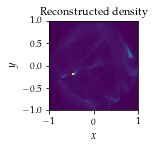

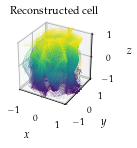

Wall time: 18.3 s


In [12]:
%%time

from scipy.special import erfinv
Gauss = lambda x, mu, sigma: mu + numpy.sqrt(2)*sigma*erfinv(2*x-1)
standard_gauss = numpy.vectorize(lambda x: Gauss((x + 1) / 2, 0, 1)) # multiple with 2 subtract one to transport -1 - 1 to -1, 1

def get_normal_points():
    x = numpy.linspace(-1, 1, 50)[1:-1]
    y = numpy.linspace(-1, 1, 50)[1:-1]
    z = numpy.linspace(-1, 1, 50)[1:-1]

    x_mesh, y_mesh, z_mesh = numpy.meshgrid(x, y, z)

    x_normal, y_normal, z_normal = numpy.meshgrid(standard_gauss(x), standard_gauss(y), standard_gauss(z))

    point_tuples = numpy.array((x_mesh, y_mesh, z_mesh)).reshape(3, -1).T
    return point_tuples, numpy.array((x_normal, y_normal, z_normal)).reshape(3, -1).T

point_tuples, normal_tuples = get_normal_points()

reconstructed_space = spline_transform(torch.tensor(normal_tuples, dtype=torch.float)).detach().numpy()
#scaled_pca_space = gh_interpolant_psi_to_X.predict(reconstructed_space)
scaled_pca_space = optimal_GHI.predict(reconstructed_space)

reconstructed_original_scaled = pca.inverse_transform(pca_scaler.inverse_transform(scaled_pca_space))
reconstructed_original = measurements_scaler.inverse_transform(reconstructed_original_scaled)[:,[0,1]]

expanded_original = numpy.append(reconstructed_original, point_tuples[:,[0,1,2]], axis=1)

print(expanded_original)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
plt.title(r"Reconstructed density")
plt.hist2d(expanded_original[:,0], expanded_original[:,1], bins=50, rasterized=True, range=numpy.array([(-1, 1), (-1, 1)]))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig("figures/bacteria/density-reconstructed.pdf", dpi=dpi, bbox_inches='tight')
plt.show()

for i in range(4,5):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect((numpy.ptp(cartesian_points[:,0]), numpy.ptp(cartesian_points[:,1]), numpy.ptp(cartesian_points[:,2])))
    ax.scatter(cartesian_points[:,0], cartesian_points[:,1], cartesian_points[:,2], alpha=0.05, s=1, c=colors, cmap='plasma', edgecolor='none', rasterized=True)
    ax.scatter(expanded_original[:,0], expanded_original[:,1], expanded_original[:,i], s=0.2, c=expanded_original[:,i], edgecolor='none', rasterized=True)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$z$")
    #ax.azim = -35
    plt.title("Reconstructed cell", y=1.05)
    plt.savefig("figures/bacteria/cell-reconstructed.pdf", dpi=dpi, bbox_inches='tight')
    plt.show()